In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegressionCV
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')
print(df.shape)
print(df.columns)

(461, 66)
Index(['TestPositive', 'IgnoreRespSymp', 'IgnoreGastroSymp', 'IgnoreNeuroSymp',
       'IgnoreInflamSymp', 'LossSmell', 'Fatigue', 'Difficultybreathing',
       'SlurredSpeech', 'Diarrhea', 'LossAppetite', 'Bluish', 'MuscleAches',
       'Confusion', 'Pinkeye', 'UnexplainedRash', 'Shortnessofbreath',
       'JointPain', 'Sorethroat', 'Shivering', 'AbdominalPain', 'ExcessSweat',
       'LossBalance', 'RedRash', 'Numbness', 'Headaches', 'Cough', 'Chills',
       'LossTaste', 'Wheezing', 'Fever', 'Vomiting', 'Runnynose', 'Chestpain',
       'RaceWhite', 'GenderFemale', 'Age30orMore', 'LossSmell_first',
       'Fatigue_first', 'Difficultybreathing_first', 'SlurredSpeech_first',
       'Diarrhea_first', 'LossAppetite_first', 'Bluish_first',
       'MuscleAches_first', 'Confusion_first', 'Pinkeye_first',
       'UnexplainedRash_first', 'Shortnessofbreath_first', 'JointPain_first',
       'Sorethroat_first', 'Shivering_first', 'AbdominalPain_first',
       'ExcessSweat_first', 'Loss

In [ ]:
# x_var_list = ["Age30orMore",'Chestpain','Chills','Fatigue','Fever', 'Headaches', 'Cough', 'LossAppetite','LossSmell','LossTaste', 'Wheezing']
x_var_list1 = ["Age30orMore","GenderFemale","Bluish","ExcessSweat","MuscleAches", "Chestpain", "Diarrhea", "Headaches", "Fatigue", "Runnynose", "Sorethroat", "Difficultybreathing", "Cough", "Chills","Fever", "Confusion", "LossTaste", "Shortnessofbreath", "JointPain", "AbdominalPain", "RedRash", "Vomiting", "LossAppetite","LossBalance", "Shivering", "Wheezing", "LossSmell", "Numbness", "UnexplainedRash", "Pinkeye", "SlurredSpeech" ]
# x_var_list = ['LossBalance','Shivering','Wheezing','LossSmell','Numbness','UnexplainedRash','Pinkeye','SlurredSpeech','Fever','Confusion','LossTaste','Shortnessofbreath','JointPain','AbdominalPain','RedRash','Vomiting','Chestpain','Diarrhea','Headaches','Fatigue','Runnynose','Sorethroat','Difficultybreathing','Cough','Chills','Bluish','ExcessSweat','Age30orMore','GenderFemale']
# x_var_list = ["Numbness", "UnexplainedRash", "Pinkeye", "SlurredSpeech", "LossSmell", "LossBalance", "Shivering", "Wheezing", "Fever", "Confusion", "LossTaste", "Shortnessofbreath", "JointPain", "AbdominalPain", "RedRash", "Vomiting", "LossAppetite", "MuscleAches", "Chestpain", "Diarrhea", "Headaches", "Fatigue", "Runnynose", "Sorethroat", "Difficultybreathing", "Cough", "Chills", "ExcessSweat", "Bluish", "GenderFemale", "Age30orMore"]
x_var_list = ["Bluish","ExcessSweat", "Chills", "Cough", "Difficultybreathing", "Sorethroat", "Runnynose", "Fatigue", "Headaches", "Diarrhea", "Chestpain", "MuscleAches", "LossAppetite", "Vomiting", "RedRash", "AbdominalPain", "JointPain", "Shortnessofbreath", "LossTaste", "Confusion", "Fever", "Wheezing", "Shivering", "LossBalance", "LossSmell", "SlurredSpeech", "Pinkeye", "UnexplainedRash", "Numbness", "GenderFemale", "Age30orMore"]
y_var = "TestPositive"
len(x_var_list)
# print(list(set(x_var_list1) - set(x_var_list2)))

31

In [ ]:
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    y = y.to_numpy()
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    y = y.to_numpy()
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

In [ ]:
X = df[x_var_list]
y = df[y_var]

model = LogisticRegressionCV(fit_intercept=False, solver='lbfgs',cv=10)
model.fit(X, y)


LogisticRegressionCV(cv=10, fit_intercept=False)

In [ ]:
w = np.array(model.coef_).transpose()
print(w)

[[ 1.27824043e-02]
 [ 1.08787889e-01]
 [ 2.48222129e-01]
 [ 3.75018222e-02]
 [ 2.38567681e-01]
 [ 1.61016322e-02]
 [-3.18513799e-01]
 [-1.60365717e-01]
 [ 3.28215464e-01]
 [ 5.70814250e-02]
 [ 3.21698067e-01]
 [ 1.31203853e-02]
 [ 2.14216992e-01]
 [ 2.16203950e-01]
 [-1.18854572e-01]
 [-1.23635337e-01]
 [ 3.13377374e-01]
 [ 8.66001699e-02]
 [ 2.01197542e-01]
 [-1.20133554e-01]
 [-3.05893572e-01]
 [ 1.17338091e-01]
 [ 1.12542262e-01]
 [-6.58182465e-02]
 [ 2.13018913e-01]
 [-6.08438710e-04]
 [ 1.45320532e-01]
 [ 2.80699631e-03]
 [-1.41130413e-01]
 [-4.34700349e-01]
 [-8.08493231e-01]]


In [ ]:
r2_score = mcfadden_rsquare(w, X, y)

In [ ]:
print(r2_score)

0.2649511097263745


In [ ]:
n1 = full_log_likelihood(w,X,y)
n2 = null_log_likelihood(w,X,y)

In [ ]:
print(n1,n2)

-234.87820741399022 -319.54093193250816


In [ ]:
scores = cross_val_score(model,X,y,cv = 10)

In [ ]:
print(scores)

[0.68085106 0.65217391 0.76086957 0.84782609 0.7173913  0.76086957
 0.82608696 0.86956522 0.73913043 0.7173913 ]


In [ ]:
avg_score = np.mean(scores)
print(avg_score)

0.7572155411655873


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [ ]:
y_pred_proba = model.predict(X)
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)


In [ ]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='estimator')

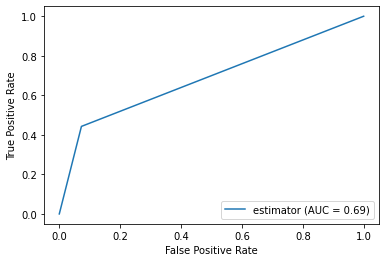

In [ ]:
display.plot()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

X_1 = df[x_var_list].to_numpy()
y_1 = df[y_var].to_numpy()

model_1 = LogisticRegression(solver="liblinear", random_state=0)
model_1.fit(X_1,y_1)

area_under_roc = roc_auc_score(y_1, model.decision_function(X_1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(area_under_roc)

0.7564885496183205
